In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",100)

# Importing csv

In [2]:
houses=pd.read_csv("train.csv")

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking how many Nans there are in each column

In [4]:
houses.isna().sum()/len(houses)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

#### Taking a list of those with more than 0% to see whether are critical or not - We check in documentation what each one means

In [5]:
df=round(houses.isna().sum()/len(houses)*100).to_frame()
nan_list=[]
for s in range(len(df)):
    if df.iloc[s,0]>0:
        nan_list.append(df.iloc[s].name)
nan_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Apparently the amount of NaN's corresponds to the absend of that feauture, so we wont drop any column. But we will fill NaN's with ceros

In [6]:
houses.fillna(0,inplace=True)
houses.drop("Id",inplace=True,axis=1)

### Checking the current type of the different columns

In [7]:
houses.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


## How does the SalePrice looks like

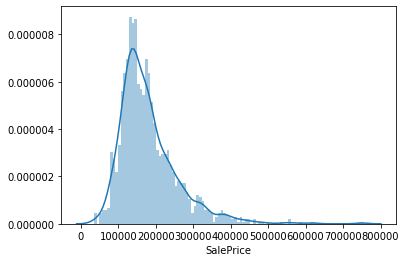

In [8]:
sns.distplot(houses["SalePrice"],bins=100);

#### We see a right-skewed distribution, we need to correct that skewedness. For that, we apply log to the SalePrice

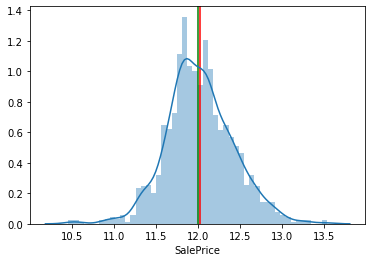

In [9]:
fig,ax=plt.subplots()

plt.axvline(x=houses["SalePrice"].apply(np.log).mean(),color="red")
plt.axvline(x=houses["SalePrice"].apply(np.log).median(),color="green")
sns.distplot(houses["SalePrice"].apply(np.log),bins=50,ax=ax);

#### We are going to add a new column with the adjusted skewed values

In [10]:
houses=houses.assign(adj_price=houses["SalePrice"].apply(np.log))

## Deciding what columns are we going to analize

#### Before making any changing to the houses df, let create a copy

In [11]:
houses_copy=houses.copy()

#### Before analyzing realtionship among the adjusted sale price and some other variables, have to transform values that are in a text-scale to numeric values

We will make the following changes:
- For all quality-related fields:
    - Ex:   5
    - Gd:   4
    - TA:   3
    - Fa:   2
    - Po:   1
- For the Utilities field:
    - AllPub: 4
    - NoSewr: 3
    - NoSeWa: 2
    - ELO   : 1
- For the CentralAir field:
    - Y:  2
    - N:  0
- For the Street:
    - Y:  2
    - P:  1
    - N:  0
- For the MSZoning field:
    - RL:      4
    - FV:      3
    - RH:      2 
    - RM:      1 
    - C (all): 0 

In [12]:
change_dict={"AllPub":4,"NoSewr":3,"NoSeWa":2,"ELO":1,'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1,"NaN":0,"NA":0,"Y":2,"P":1,"N":0}

In [13]:
for i in houses_copy.columns:
    if houses_copy[i].dtype == "object":
        houses_copy = houses_copy.replace({i:change_dict})
        try:
            houses_copy[i] = houses_copy[i].astype("int")
        except:
            continue

In [14]:
dict_zone={'C (all)':0, 'FV':3, 'RH':2, 'RL':4, 'RM':1}
houses_copy["MSZoning"]=houses_copy["MSZoning"].map(dict_zone)

In [15]:
houses_copy.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,adj_price
0,60,4,65.0,8450,Pave,0,Reg,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,2,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,2,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,20,4,80.0,9600,Pave,0,Reg,Lvl,4,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,2,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,2,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,60,4,68.0,11250,Pave,0,IR1,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,2,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,2,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,70,4,60.0,9550,Pave,0,IR1,Lvl,4,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,2,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,2,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000,11.849398
4,60,4,84.0,14260,Pave,0,IR1,Lvl,4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,2,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,2,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000,12.429216


#### Lets explore some potential relationships among the adjusted sale price and some other variables

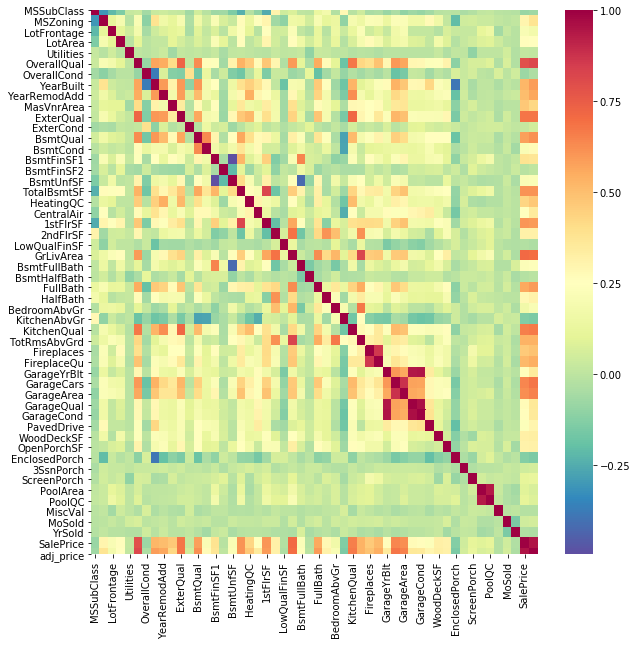

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(houses_copy.corr(),cmap='Spectral_r',ax=ax);

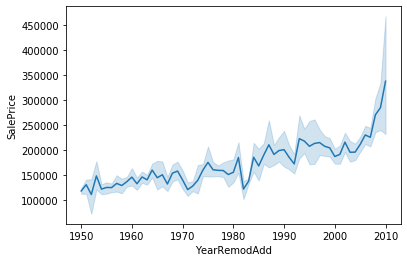

In [17]:
x=houses["YearRemodAdd"]
y=houses["SalePrice"]
sns.lineplot(x,y);

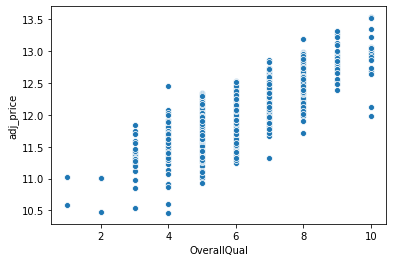

In [18]:
sns.scatterplot(data=houses_copy,x="OverallQual",y="adj_price");

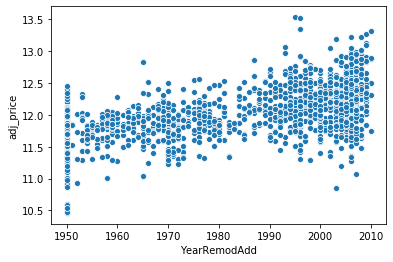

In [19]:
sns.scatterplot(data=houses_copy,x="YearRemodAdd",y="adj_price");

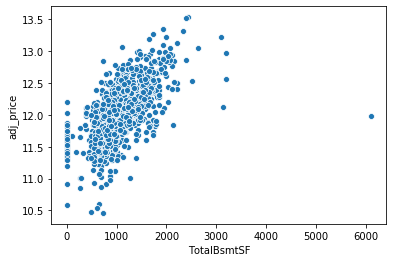

In [20]:
sns.scatterplot(data=houses_copy,x="TotalBsmtSF",y="adj_price");

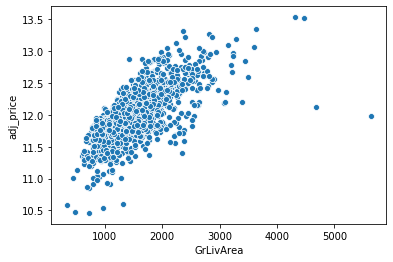

In [21]:
sns.scatterplot(data=houses_copy,x="GrLivArea",y="adj_price");

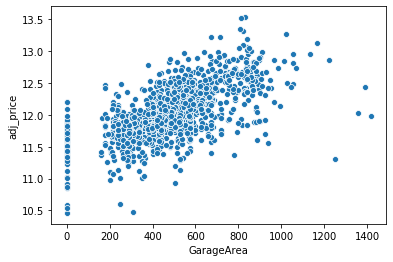

In [22]:
sns.scatterplot(data=houses_copy,x="GarageArea",y="adj_price");

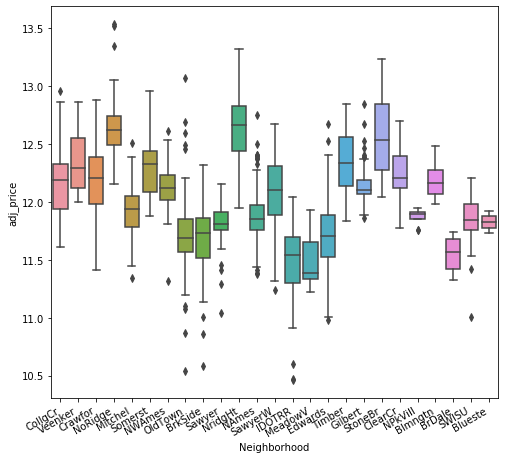

In [23]:
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=houses_copy,x="Neighborhood",y="adj_price",ax=ax);
fig.autofmt_xdate()

### Now we create a Feature column that combines property elements. 
If the property has that element it will sum 1, if it doesn't 0. The new column will be the sum of those elements

In [24]:
features=["BsmtQual","CentralAir","2ndFlrSF","BsmtFullBath","KitchenAbvGr","Fireplaces","GarageQual","PoolQC","Fence","MiscFeature"]
new_col=[]

for i in range(len(houses_copy)):
    suma=0
    for col in features:
        if houses_copy[col][i]!=0:
            suma+=1
    new_col.append(suma)


In [25]:
houses_copy=houses_copy.assign(no_feature=new_col)

Now we check the correlation with the adjusted price

In [45]:
x=houses_copy["no_feature"]
y=houses_copy["adj_price"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              adj_price   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          3.844e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:50:24   Log-Likelihood:                         -3288.1
No. Observations:                1460   AIC:                                      6578.
Df Residuals:                    1459   BIC:                                      6583.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
no_feature     2.1164      0.011    196.057      0.000       2.095       2.138
==============================================================================
Omnibus:                       26.053   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.260
Skew:                           0.209   Prob(JB):                     2.20e-08
Kurtosis:                       3.636   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now we check the correlation between the Qualities and the conditions

##### Exterior Quality and conditions

In [27]:
x=houses_copy["ExterQual"]
y=houses_copy["ExterCond"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ExterCond   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          3.513e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                         -1373.1
No. Observations:                1460   AIC:                                      2748.
Df Residuals:                    1459   BIC:                                      2753.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ExterQual      0.8830      0.005    187.426      0.000       0.874       0.892
==============================================================================
Omnibus:                        3.606   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.966
Skew:                          -0.034   Prob(JB):                        0.138
Kurtosis:                       3.246   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Basement Quality and conditions

In [28]:
x=houses_copy["BsmtQual"]
y=houses_copy["BsmtCond"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               BsmtCond   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          3.878e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                         -1247.5
No. Observations:                1460   AIC:                                      2497.
Df Residuals:                    1459   BIC:                                      2502.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BsmtQual       0.8150      0.004    196.925      0.000       0.807       0.823
==============================================================================
Omnibus:                        6.603   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.315
Skew:                          -0.127   Prob(JB):                       0.0425
Kurtosis:                       2.802   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Garage Quality and conditions

In [29]:
x=houses_copy["GarageQual"]
y=houses_copy["GarageCond"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             GarageCond   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          2.880e+05
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                          236.00
No. Observations:                1460   AIC:                                     -470.0
Df Residuals:                    1459   BIC:                                     -464.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GarageQual     0.9967      0.002    536.663      0.000       0.993       1.000
==============================================================================
Omnibus:                      484.740   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38273.566
Skew:                          -0.608   Prob(JB):                         0.00
Kurtosis:                      28.053   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x=houses_copy["OverallQual"]
y=houses_copy["OverallCond"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            OverallCond   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          1.425e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                         -2874.1
No. Observations:                1460   AIC:                                      5750.
Df Residuals:                    1459   BIC:                                      5755.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual     0.8658      0.007    119.376      0.000       0.852       0.880
==============================================================================
Omnibus:                       31.665   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.554
Skew:                           0.102   Prob(JB):                     9.35e-05
Kurtosis:                       2.487   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Results: Looks like they are highly correlated, so we will just take one of the variables to avoid redundancy in our model

### This are the columns that will be taken for further analysis:

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- OverallQual: Rates the overall material and finish of the house 
- ExterQual: Evaluates the quality of the material on the exterior
- BsmtCond: Evaluates the general condition of the basement
- KitchenQual: Kitchen quality
- GarageQual: Garage quality
- MSZoning: Identifies the general zoning classification of the sale
- Features: The number of features that the house has (boolean, 1 has that feature 0 doesnt) among the following:
    - BsmtQual
    - CentralAir
    - 2ndFlrSF
    - BsmtFullBath
    - KitchenAbvGr
    - Fireplaces
    - GarageQual
    - PoolQC
    - Fence
    - MiscFeature
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageCars: Size of garage in car capacity
- SalePrice: Price of the properties. Field to be predicted
- adj_price: Adjusted price

In [31]:
cols_to_keep=["YearRemodAdd",
              "TotalBsmtSF",
              "GrLivArea",
              "OverallQual",
              "no_feature",
              "TotRmsAbvGrd",
              "GarageCars",
              "MSZoning",
              "GarageQual",
              "ExterQual",
              "BsmtCond",
              "KitchenQual",
              "SalePrice",
              "adj_price"
             ]

In [32]:
home=houses_copy.copy()
home=home[cols_to_keep]
home.head()

,YearRemodAdd,TotalBsmtSF,GrLivArea,OverallQual,no_feature,TotRmsAbvGrd,GarageCars,MSZoning,GarageQual,ExterQual,BsmtCond,KitchenQual,SalePrice,adj_price
0,2003,856,1710,7,6,8,2,4,3,4,3,4,208500,12.247694
1,1976,1262,1262,6,5,6,2,4,3,3,3,3,181500,12.109011
2,2002,920,1786,7,7,6,2,4,3,4,3,4,223500,12.317167
3,1970,756,1717,7,7,7,3,4,3,3,4,4,140000,11.849398
4,2000,1145,2198,8,7,9,3,4,3,4,3,4,250000,12.429216


In [33]:
x=home[["OverallQual","YearRemodAdd","GarageQual","ExterQual","KitchenQual","no_feature","TotRmsAbvGrd","MSZoning"]]
y=home["adj_price"]

sm.add_constant(x)
lin_reg=sm.OLS(y,x).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              adj_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.932e+05
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:49:57   Log-Likelihood:                          416.07
No. Observations:                1460   AIC:                                     -816.1
Df Residuals:                    1452   BIC:                                     -773.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual      0.1163      0.006     20.297      0.000       0.105       0.128
YearRemodAdd     0.0051   1.91e-05    267.195      0.000       0.005       0.005
GarageQual       0.0475      0.007      6.394      0.000       0.033       0.062
ExterQual        0.0434      0.014      3.173      0.002       0.017       0.070
KitchenQual      0.0259      0.011      2.363      0.018       0.004       0.047
no_feature       0.0456      0.005      9.176      0.000       0.036       0.055
TotRmsAbvGrd     0.0510      0.003     15.244      0.000       0.044       0.058
MSZoning         0.0605      0.004     13.659      0.000       0.052       0.069
==============================================================================
Omnibus:                      102.525   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.044
Skew:                          -0.282   Prob(JB):                     1.61e-76
Kurtosis:                       5.328   Cond. No.                     6.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RESULTS

From the **OLS Regression Results** we see that all values are statistically significant. All variables, as expected, are positively correlated with the adjusted price, which means that the higher the quality and the newer and larger the property is, the higher will be the adjusted price.

### Now we want to see how close the predictions are from the real sale price. We will perform this analysis in two different datasets. 
1. With the same dataset used for building the model
2. With a new dataset wit different values

### 1. Predict SalePrice with the same dataset used to build the model

1. We first make a copy of the dataset "home" that contains all transformations needed
2. We predict the values of the adjusted sale price and we convert it again into a non-logaritmic value (np.exp)
3. We perform a ttest_ind (The test measures whether the average (expected) value differs significantly across samples) --> The higher the p-value the better in this case

In [34]:
predict_df=home.copy()
predictions2=lin_reg.predict(predict_df[["OverallQual","YearRemodAdd","GarageQual","ExterQual","KitchenQual","no_feature","TotRmsAbvGrd","MSZoning"]])
predict_df=predict_df.assign(prediction=predictions2)
predict_df=predict_df.assign(prediction_price=np.exp(predict_df["prediction"]))

In [35]:
ttest_ind(predict_df["SalePrice"],predict_df["prediction_price"],equal_var=False)

Ttest_indResult(statistic=1.0129909542419937, pvalue=0.3111511031985833)

In [36]:
(predict_df["SalePrice"]-predict_df["prediction_price"]).std()

38832.66785312007

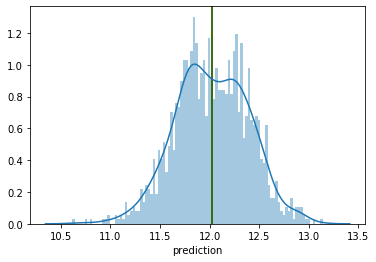

In [37]:
fig,ax=plt.subplots()

plt.axvline(x=predict_df["prediction"].mean(),color="red")
plt.axvline(x=predict_df["prediction"].median(),color="green")
sns.distplot(predict_df["prediction"],bins=100);

### 2. Predict SalePrice with a new dataset

1. We first load the new dataset "test" and the "ids" dataset where the real price of the properties of the "test" dataset are.
2. We merge those dfs
3. We perform all the transformations needed so that the columns are numerical
4. We predict the values of the adjusted sale price and we convert it again into a non-logaritmic value (np.exp)
5. We perform a ttest_ind (The test measures whether the average (expected) value differs significantly across samples) --> The higher the p-value the better in this case

In [38]:
test=pd.read_csv("test.csv")
ids=pd.read_csv("sample_submission.csv")

In [39]:
ids["SalePrice"]=ids["SalePrice"].astype("float")
test=test.merge(ids,on="Id")

In [40]:
for i in test.columns:
    if test[i].dtype == "object":
        test = test.replace({i:change_dict})
        try:
            test[i] = test[i].astype("int")
        except:
            continue

features2=["BsmtQual","CentralAir","2ndFlrSF","BsmtFullBath","KitchenAbvGr","Fireplaces","GarageQual","PoolQC","Fence","MiscFeature"]
new_col2=[]

for i in range(len(test)):
    suma=0
    for col in features2:
        if test[col][i]!=0:
            suma+=1
    new_col2.append(suma)
test=test.assign(no_feature=new_col2)


test["MSZoning"]=test["MSZoning"].map(dict_zone)

test=test.assign(adj_price=test["SalePrice"].apply(np.log)) 
test=test[cols_to_keep]

test["GarageQual"].fillna(0,inplace=True)


In [41]:
predictions=lin_reg.predict(test[["OverallQual","YearRemodAdd","GarageQual","ExterQual","KitchenQual","no_feature","TotRmsAbvGrd","MSZoning"]])
test=test.assign(prediction=predictions)
test["prediction"]=test["prediction"].astype("float")
test=test.assign(prediction_price=np.exp(test["prediction"]))

In [42]:
ttest_ind(test["SalePrice"],test["prediction_price"],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=-9.927056726116241, pvalue=1.4175002295027092e-22)

In [43]:
(test["SalePrice"]-test["prediction_price"]).std()

73197.00024310664

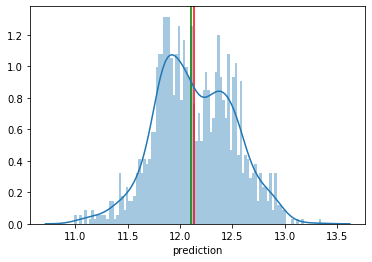

In [46]:
fig,ax=plt.subplots()

plt.axvline(x=test["prediction"].mean(),color="red")
plt.axvline(x=test["prediction"].median(),color="green")
sns.distplot(test["prediction"],bins=100);

## RESULTS

In the first case (Predict SalePrice with the same dataset used to build the model) we observe a high P-Value (0.311) and a relatively small stdv of the difference between the predicted and the real sale price (38832.6678).

In the second case (Predict SalePrice with a new dataset) we observe a low P-Value (1.417e-22) and a relatively high stdv of the difference between the predicted and the real sale price (73197.00).

We can observe that the model in the first case predicted better the sale price of the properties than in the second case, for which the nullhypothesis has to be rejected and therefore conclude that the model built is not accurate enough to be used for any other dataset.
